# GRIP - Task 5 - Stock Sentiment Analysis
## By Bhaskar B Sarkar

#### Importing libraries

In [113]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

#### Importing news datasets

In [3]:
headlines = pd.read_csv('india-news-headlines.csv')
headlines.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


#### Create date time column

In [4]:
def change_date(row):
    row = str(row)
    new_row = row[:4] + '/' + row[4:6] + '/' + row[6:]
    return new_row
headlines['publish_date'] = headlines['publish_date'].apply(change_date)

In [5]:
headlines['publish_date'] = pd.to_datetime(headlines['publish_date'])
headlines.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


#### Data cleaning

In [6]:
def clean_text(row):
    row = str(row).lower()
    new_row = re.sub("[^a-zA-Z]", " ", row) + ' '
    return new_row

In [7]:
headlines['headline_text'] = headlines['headline_text'].apply(clean_text)

In [8]:
headlines.drop('headline_category', axis=1, inplace=True)

#### Headlines data merging

In [9]:
news = headlines.groupby('publish_date').sum()
news.head()

,headline_text
publish_date,
2001-01-01,win over cena satisfying but defeating underta...
2001-01-02,status quo will not be disturbed at ayodhya s...
2001-01-03,powerless north india gropes in the dark think...
2001-01-04,the string that pulled stephen hawking to indi...
2001-01-05,light combat craft takes india into club class...


In [10]:
news.iloc[2]['headline_text']

'powerless north india gropes in the dark think again  laxman tells sangh parivar hurriyat undecided over team to pakistan vajpayee wants to put reforms on fast track stephen hawking keeps date with mumbai anti hrithik or anti hopelessness govt plans stadium near panaji bjp doing a volte face on casinos  cong   watershed projects on the anvil no report yet on fire in udyog bhavan he is the king of  five star  industry petrol pump sealed for selling adulterated fuel milk price up by rs   per litre congress house is no smoking zone rural weightage  govt reassures governor bride gets honeymoon surprise  chopper ride is hangover a sign of alcoholicism  almatti  ap to wait and watch    year old girl missing hear his messages from the heart dance like no one s watching from reel love to real love power row  bribe attempt charge denied lakshamma s cry for help heard it s shopping time for your newborn con games on the catwalk they are here to help us these noisy spots are hurting your ears fl

In [11]:
news.rename(columns={'headline_text': 'Headlines'}, inplace=True)
news.index.names = ['Date']

#### Calculating Polaity and Subjectiity of Headlines data

In [12]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [13]:
news['Polarity'] = news['Headlines'].apply(polarity)
news['Subjectivity'] = news['Headlines'].apply(subjectivity)

In [64]:
news.head()

,Headlines,Polarity,Subjectivity,Sentiment,Opinion
Date,,,,,
2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,Positive,Public
2001-01-02,status quo will not be disturbed at ayodhya s...,0.143590,0.286859,Neutral,Factual
2001-01-03,powerless north india gropes in the dark think...,0.089286,0.392857,Neutral,Factual
2001-01-04,the string that pulled stephen hawking to indi...,0.093039,0.445360,Neutral,Public
2001-01-05,light combat craft takes india into club class...,0.264024,0.480553,Positive,Public


In [15]:
news['Sentiment'] = news['Polarity'].apply(lambda x: 'Positive' if x>=0.2 else ("Negative" if x<=-0.2 else "Neutral"))
news['Opinion'] = news['Subjectivity'].apply(lambda x: 'Public' if x>=0.40 else 'Factual')

In [16]:
news.head()

,Headlines,Polarity,Subjectivity,Sentiment,Opinion
Date,,,,,
2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,Positive,Public
2001-01-02,status quo will not be disturbed at ayodhya s...,0.143590,0.286859,Neutral,Factual
2001-01-03,powerless north india gropes in the dark think...,0.089286,0.392857,Neutral,Factual
2001-01-04,the string that pulled stephen hawking to indi...,0.093039,0.445360,Neutral,Public
2001-01-05,light combat craft takes india into club class...,0.264024,0.480553,Positive,Public


#### Graph shows different sentiment measures from Headlines data

In [17]:
positive = news[news['Sentiment']=='Positive']
negative = news[news['Sentiment']=='Negative']
neutral = news[news['Sentiment']=='Neutral']

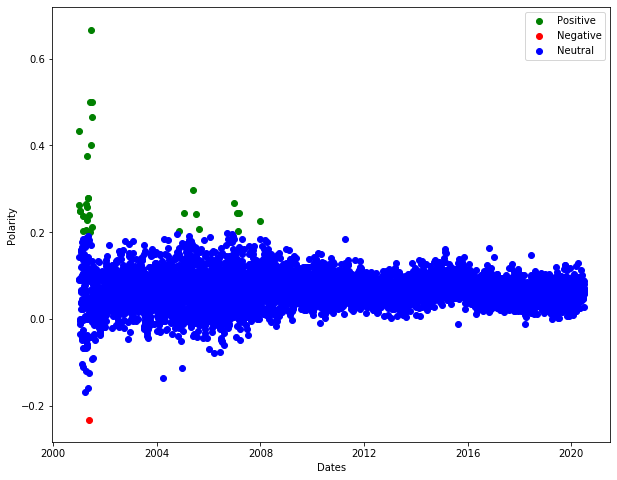

In [18]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(x=positive.index, y=positive['Polarity'], c='green', label='Positive')
plt.scatter(x=negative.index, y=negative['Polarity'], c='red', label='Negative')
plt.scatter(x=neutral.index, y=neutral['Polarity'], c='b', label='Neutral')
plt.xlabel('Dates')
plt.ylabel('Polarity')
plt.legend()

In [19]:
public = news[news['Opinion']=='Public']
fact = news[news['Opinion']=='Factual']

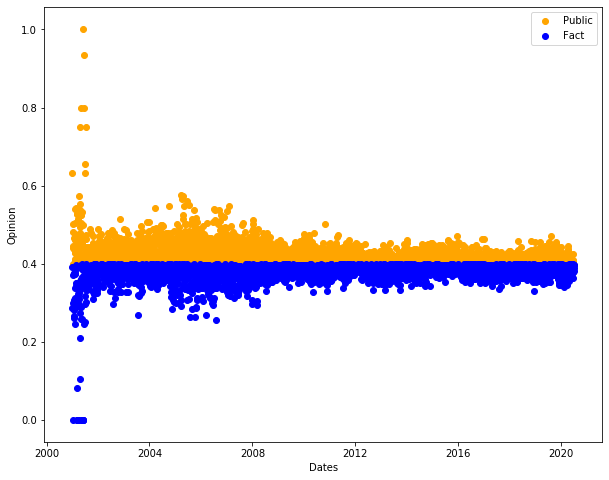

In [20]:
plt.scatter(x=public.index, y=public.Subjectivity, c='orange', label='Public')
plt.scatter(x=fact.index, y=fact.Subjectivity, c='blue', label='Fact')
plt.xlabel('Dates')
plt.ylabel('Opinion')
plt.legend()

#### Importing stock dataset

In [76]:
stocks = pd.read_csv('^BSESN.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4869 non-null   datetime64[ns]
 1   Open       4795 non-null   float64       
 2   High       4795 non-null   float64       
 3   Low        4795 non-null   float64       
 4   Close      4795 non-null   float64       
 5   Adj Close  4795 non-null   float64       
 6   Volume     4795 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 266.4 KB


#### Merging news and stocks dataset together

In [106]:
stocks_final = news.merge(stocks, how='inner', on='Date', left_index=True)
stocks_final.dropna(inplace=True)
stocks_final.drop(['Sentiment', 'Opinion', 'Volume'], axis=1, inplace=True)
stocks_final.set_index('Date', inplace=True)

#### Saving new News dataset with polarity and subjectivity values

In [78]:
news.to_csv('news_analysis.csv')

In [109]:
stocks_final.head()

,Headlines,Polarity,Subjectivity,Open,High,Low,Close,Adj Close
Date,,,,,,,,
2001-01-02,status quo will not be disturbed at ayodhya s...,0.143590,0.286859,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883
2001-01-03,powerless north india gropes in the dark think...,0.089286,0.392857,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020
2001-01-04,the string that pulled stephen hawking to indi...,0.093039,0.445360,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117
2001-01-05,light combat craft takes india into club class...,0.264024,0.480553,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980
2001-01-08,sangh parivar babri panel up the ante frontru...,-0.011266,0.400343,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176


#### Closing price trend 

Text(0.5, 1.0, 'S&P BSE SENSEX')

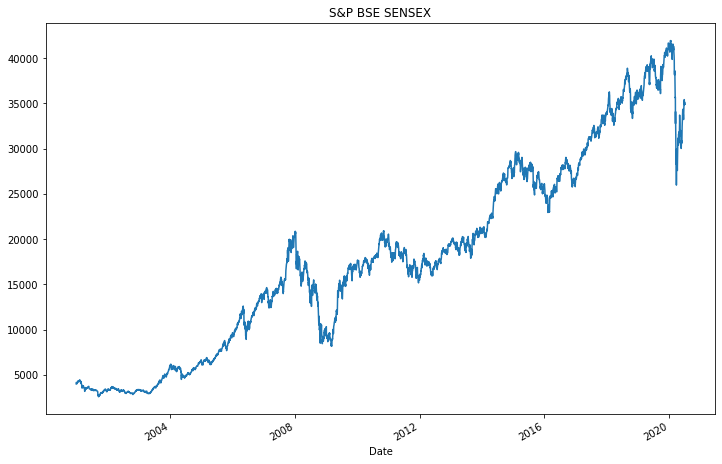

In [130]:
plt.figure(figsize=(12,8))
stocks_final['Close'].plot()
plt.title("S&P BSE SENSEX")

Text(0.5, 1.0, 'S&P BSE SENSEX')

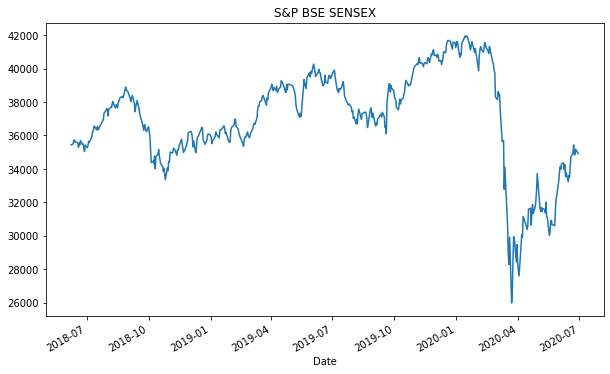

In [134]:
stocks_final['Close'][-500:].plot(figsize=(10,6))
plt.title("S&P BSE SENSEX")

#### Sentiment scores for each day

In [114]:
def getSIA(text): 
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

compound = []
neg = []
neu = []
pos = []
SIA = 0

for i in range(0, len(stocks_final['Headlines'])):
    clear_output(wait=True)
    SIA = getSIA(stocks_final['Headlines'][i])
    print((i/len(stocks_final['Headlines']))*100, '%')
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

99.9790224459828 %


In [115]:
stocks_final['Compound'] =compound
stocks_final['Negative'] =neg
stocks_final['Neutral'] =neu
stocks_final['Positive'] = pos

In [117]:
stocks_final.to_csv('stocks_final.csv')

In [118]:
stocks_final['Change'] = stocks_final['Close'] - stocks_final['Open']
stocks_final['Change'] = stocks_final['Change'].apply(lambda x: 1 if x>=0 else 0)

#### Final dataset to train and test

In [119]:
stocks_final.head()

,Headlines,Polarity,Subjectivity,Open,High,Low,Close,Adj Close,Compound,Negative,Neutral,Positive,Change
Date,,,,,,,,,,,,,
2001-01-02,status quo will not be disturbed at ayodhya s...,0.143590,0.286859,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,-0.9508,0.109,0.817,0.074,1
2001-01-03,powerless north india gropes in the dark think...,0.089286,0.392857,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,-0.7506,0.150,0.731,0.119,1
2001-01-04,the string that pulled stephen hawking to indi...,0.093039,0.445360,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.7543,0.100,0.800,0.100,0
2001-01-05,light combat craft takes india into club class...,0.264024,0.480553,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.9836,0.134,0.701,0.164,1
2001-01-08,sangh parivar babri panel up the ante frontru...,-0.011266,0.400343,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,-0.9477,0.116,0.803,0.081,0


In [121]:
keep_columns = [ 'Open',  'High', 'Low', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive',  'Change' ]
final_df = stocks_final[keep_columns]

In [123]:
X= np.array(final_df.drop('Change', axis=1))
y= np.array(final_df['Change'])

####  Creating training and testing datasets

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### Model used is LDA

In [125]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()

In [126]:
model.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [128]:
predictions = model.predict(x_test)

#### Classification Report which suggests that our accuracy is 88%

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       521
           1       0.88      0.85      0.86       433

    accuracy                           0.88       954
   macro avg       0.88      0.87      0.87       954
weighted avg       0.88      0.88      0.88       954

